# Read in Data

In [1]:
# Import data.
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv('watch_reviews.tsv', sep='\t', error_bad_lines=False)

[nltk_data] Downloading package punkt to /Users/judychen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/judychen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
b'Skipping line 8704: expected 15 fields, saw 22\nSkipping line 16933: expected 15 fields, saw 22\nSkipping line 23726: expected 15 fields, saw 22\n'
b'Skipping line 85637: expected 15 fields, saw 22\n'
b'Skipping line 132136: expected 15 fields, saw 22\nSkipping line 158070: expected 15 fields, saw 22\nSkipping line 166007: expected 15 fields, saw 22\nSkipping line 171877: expected 15 fields, saw 22\nSkipping line 177756: expected 15 fields, saw 22\nSkipping line 181773: expected 15 fields, saw 22\nSkipping line 191085: expected 15 fields, saw 22\nSkipping line 196273: expected 15 fields, saw 22\nSkipping line 196331: expected 15 fields, saw 22\n'
b'Skipping line 197000: expected 15 fields, saw 22\nSkipping line 197011: exp

In [2]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,N,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31
1,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,N,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31
2,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,N,Y,Two Stars,Scratches,2015-08-31
3,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,N,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31
4,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,N,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31


In [3]:
# Check missing values.
df.isnull().sum()

marketplace            0
customer_id            0
review_id              0
product_id             0
product_parent         0
product_title          2
product_category       0
star_rating            0
helpful_votes          0
total_votes            0
vine                   0
verified_purchase      0
review_headline        7
review_body          148
review_date            4
dtype: int64

In [4]:
# Remove if the review without review boday.
df.dropna(subset=['review_body'], inplace=True)
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960056 entries, 0 to 960055
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        960056 non-null  object
 1   customer_id        960056 non-null  int64 
 2   review_id          960056 non-null  object
 3   product_id         960056 non-null  object
 4   product_parent     960056 non-null  int64 
 5   product_title      960054 non-null  object
 6   product_category   960056 non-null  object
 7   star_rating        960056 non-null  int64 
 8   helpful_votes      960056 non-null  int64 
 9   total_votes        960056 non-null  int64 
 10  vine               960056 non-null  object
 11  verified_purchase  960056 non-null  object
 12  review_headline    960049 non-null  object
 13  review_body        960056 non-null  object
 14  review_date        960052 non-null  object
dtypes: int64(5), object(10)
memory usage: 109.9+ MB


In [69]:
# Use the 10000 data as training data.
data = df.sample(n = 20000)
data = data.loc[:, 'review_body'].tolist()

# Tokenizing and Stemming

Load stopwords and stemmer function from NLTK library.

In [70]:
# Use nltk's English stopwords.
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append("'s")
stopwords.append("'m")
stopwords.append("br") #html <br>
stopwords.append("watch")

print("Stopwords that we use from nltk library: ")
print(stopwords)

Stopwords that we use from nltk library: 
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'no

In [71]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# Define functions to tokenize and stem reviews.
def tokenization_and_stemming(text):
    # exclude stop words and tokenize the document, generate a list of string
    tokens = []
    for word in nltk.word_tokenize(text):
        if word.lower() not in stopwords:
            tokens.append(word.lower())
    
    # filter out any tokens not containing letters such as numeric tokens and raw punctuation.
    filtered_tokens = []
    for token in tokens:
        if token.isalpha():
            filtered_tokens.append(token)
    
    # stemming.
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

# Test function with the first review.
print(data[0])
print(tokenization_and_stemming(data[0]))


Been having the watch for a couple of days and i have to say it looks pretty good. It looks better in person for some reason.<br /><br />Pros:<br />* The features it comes with are all really useful except the data bank.<br />* The strap is a really nice length, especially for people with small wrists.<br />* I love the ability to see the time in both analog and digital, even though i look at the digital side more.<br /><br />Cons:<br />* The light is an ugly orange color that turns off too quickly.
['coupl', 'day', 'say', 'look', 'pretti', 'good', 'look', 'better', 'person', 'pros', 'featur', 'come', 'realli', 'use', 'except', 'data', 'strap', 'realli', 'nice', 'length', 'especi', 'peopl', 'small', 'love', 'abil', 'see', 'time', 'analog', 'digit', 'even', 'though', 'look', 'digit', 'side', 'con', 'light', 'ugli', 'orang', 'color', 'turn', 'quick']


# Term Frequency - Inverse Document Frequency

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Define vectorizer parameters, and use TfidfVectorizer to create tf-idf matrix
tfidf_model = TfidfVectorizer(max_df=0.99, max_features=1000, min_df=0.01, stop_words='english', use_idf=True, 
                                tokenizer=tokenization_and_stemming, ngram_range=(1,1))

# Fit the vectorizer to synopses
tfidf_matrix = tfidf_model.fit_transform(data)
tfidf_matrix

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


<20000x352 sparse matrix of type '<class 'numpy.float64'>'
	with 222956 stored elements in Compressed Sparse Row format>

In [73]:
# Save terms identified by TF-IDF
tf_selected_words = tfidf_model.get_feature_names()
print(tf_selected_words)

['abl', 'absolut', 'accur', 'actual', 'adjust', 'ago', 'alarm', 'alreadi', 'alway', 'amaz', 'amazon', 'anoth', 'anyon', 'anyth', 'appear', 'arm', 'arriv', 'ask', 'attract', 'automat', 'away', 'awesom', 'bad', 'band', 'batteri', 'beat', 'beauti', 'believ', 'best', 'better', 'bezel', 'big', 'bigger', 'birthday', 'bit', 'black', 'blue', 'bought', 'box', 'bracelet', 'brand', 'break', 'bright', 'broke', 'broken', 'button', 'buy', 'ca', 'came', 'care', 'case', 'casio', 'casual', 'chang', 'charg', 'cheap', 'check', 'christma', 'chronograph', 'citizen', 'clasp', 'classi', 'classic', 'clean', 'clear', 'clock', 'close', 'collect', 'color', 'come', 'comfort', 'comment', 'compani', 'complaint', 'complet', 'compliment', 'condit', 'consid', 'cool', 'correct', 'cost', 'coupl', 'crown', 'crystal', 'custom', 'cute', 'daili', 'dark', 'date', 'daughter', 'day', 'deal', 'decid', 'definit', 'deliveri', 'describ', 'descript', 'design', 'dial', 'differ', 'difficult', 'digit', 'disappoint', 'display', 'dress'

# K-means Clustering

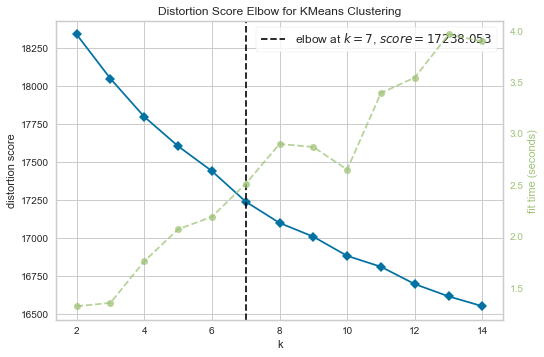

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
# Select number of cluster
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(tfidf_matrix)    # Fit the data to the visualizer
visualizer.show() 

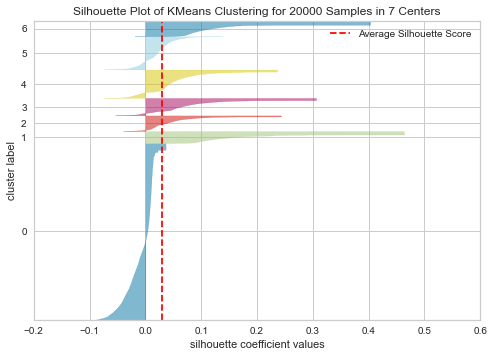

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 20000 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [75]:
# Check the silhouette score
kmeans = KMeans(n_clusters=7)

model_km = SilhouetteVisualizer(kmeans, colors='yellowbrick')
model_km.fit(tfidf_matrix) # Fit the data to the visualizer
           
model_km.show()

In [76]:
# Based on the Elbow method above, define number of clusters as 9.
num_clusters = 7
km = KMeans(n_clusters= num_clusters)
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [78]:
# Analyze K-means Result
# Create dataframe films from all of the input files.
product = {'review': df[:20000].review_body, 'cluster': clusters}
frame = pd.DataFrame(product, columns = ['review', 'cluster'])
frame.head(10)

,review,cluster
0,Absolutely love this watch! Get compliments al...,5
1,I love this watch it keeps time wonderfully.,1
2,Scratches,2
3,"It works well on me. However, I found cheaper ...",5
4,Beautiful watch face. The band looks nice all...,5
5,"i love this watch for my purpose, about the pe...",1
6,"for my wife and she loved it, looks great and ...",1
7,I was about to buy this thinking it was a Swis...,5
8,Watch is perfect. Rugged with the metal &#34;B...,1
9,Great quality and build.<br />The motors are r...,5


In [79]:
# Number of reviews included in each cluster.
frame['cluster'].value_counts().to_frame()

,cluster
1,9600
5,4913
2,1947
4,1183
0,1091
6,807
3,459


In [80]:
# km.cluster_centers_ denotes the importances of each items in centroid
km.cluster_centers_

array([[0.00104891, 0.02188813, 0.00143781, ..., 0.00806534, 0.00194438,
        0.00682973],
       [0.00540693, 0.00744136, 0.00837097, ..., 0.00613476, 0.00539844,
        0.01932129],
       [0.0026785 , 0.00460023, 0.00431145, ..., 0.01482215, 0.00343482,
        0.01206581],
       ...,
       [0.00176158, 0.00175613, 0.00332487, ..., 0.01145987, 0.00337381,
        0.00613725],
       [0.00592019, 0.00540189, 0.00886953, ..., 0.06466295, 0.00313843,
        0.0210214 ],
       [0.00074141, 0.0009036 , 0.00515166, ..., 0.0101043 , 0.00143515,
        0.00449673]])

In [81]:
# Clustering result by K-means
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

cluster_keywords_summary = {}
for i in range(num_clusters):
    print ("Cluster " + str(i) + " words:", end='')
    cluster_keywords_summary[i] = []
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        cluster_keywords_summary[i].append(tf_selected_words[ind])
        print (tf_selected_words[ind] + ",", end='')
    print ()

    cluster_reviews = frame[frame.cluster==i].review.tolist()
    print ("Cluster " + str(i) + " reviews (" + str(len(cluster_reviews)) + " reviews): ")

Cluster 0 words:love,gift,husband,bought,beauti,wife,
Cluster 0 reviews (1091 reviews): 
Cluster 1 words:time,work,beauti,love,look,use,
Cluster 1 reviews (9600 reviews): 
Cluster 2 words:great,look,price,love,work,time,
Cluster 2 reviews (1947 reviews): 
Cluster 3 words:excel,product,qualiti,recommend,price,good,
Cluster 3 reviews (459 reviews): 
Cluster 4 words:nice,look,price,love,good,like,
Cluster 4 reviews (1183 reviews): 
Cluster 5 words:band,like,look,wrist,face,wear,
Cluster 5 reviews (4913 reviews): 
Cluster 6 words:good,product,look,qualiti,price,thank,
Cluster 6 reviews (807 reviews): 


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

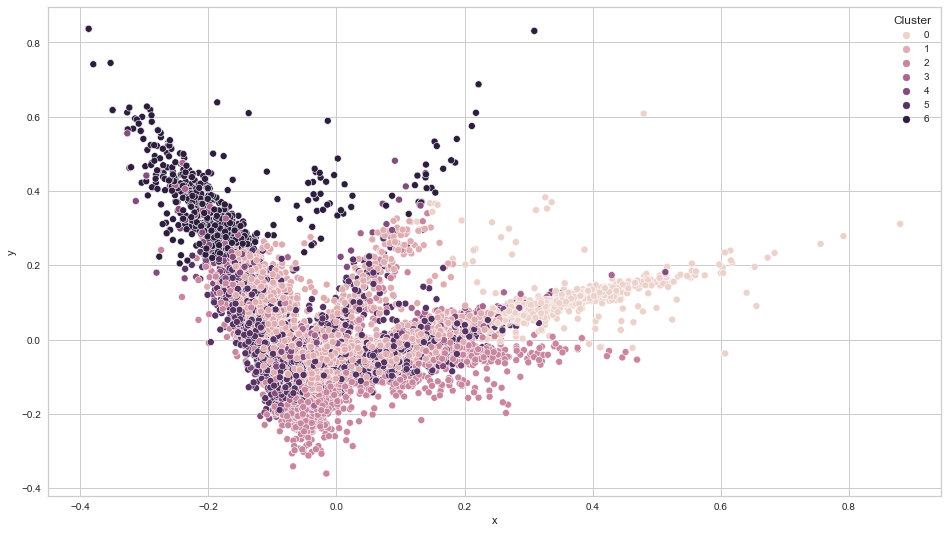

In [82]:
# Plot the kmeans result
pca = KernelPCA(n_components=2)
tfidf_matrix_np = tfidf_matrix.toarray()
X = pca.fit_transform(tfidf_matrix_np)
xs, ys = X[:, 0], X[:, 1]

pca_df = pd.DataFrame(dict(x = xs, y = ys, Cluster = clusters))
plt.subplots(figsize=(16,9))
sns.scatterplot('x', 'y', data=pca_df, hue = 'Cluster')

# Topic Modeling - Latent Dirichlet Allocation

In [83]:
# Use LDA for clustering
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=7)

In [84]:
# document topic matrix for tfida_matrix_lda
lda_output = lda.fit_transform(tfidf_matrix)
print(lda_output)

[[0.02562713 0.45496087 0.02573772 ... 0.02567391 0.4167116  0.02564376]
 [0.07167128 0.07142859 0.07160691 ... 0.07146672 0.57092468 0.07142858]
 [0.03537594 0.03534917 0.03522672 ... 0.03519377 0.7883417  0.03516458]
 ...
 [0.04419372 0.04285347 0.04294138 ... 0.04294464 0.04304664 0.74071295]
 [0.03850203 0.03834072 0.03832654 ... 0.03827791 0.76989369 0.03836844]
 [0.57099496 0.07154069 0.07149507 ... 0.07153436 0.0714839  0.07148661]]


In [85]:
# Topics and words matrix
topic_word = lda.components_
print(topic_word)

[[3.46842671e-01 2.94093307e-01 1.61304474e+01 ... 7.56160013e+00
  9.68932517e+00 1.25716120e+00]
 [3.06033743e+00 1.43137657e-01 2.06119647e+01 ... 9.88724890e+01
  9.91619654e-01 1.27229011e+01]
 [1.19642442e+01 1.43059705e-01 1.76809594e+01 ... 8.80506118e+00
  2.49678385e+01 5.53089534e+01]
 ...
 [1.16732814e+01 9.64940967e+00 4.93222824e+00 ... 1.77646372e+02
  5.25430968e+00 3.11852470e+01]
 [1.25028452e+01 2.43322462e+01 6.70542068e+01 ... 9.50888955e+01
  1.67984519e+01 5.01390637e+01]
 [5.89232415e+00 9.00030231e+01 1.65044628e-01 ... 1.14470761e+01
  3.07698477e+00 4.09689515e+01]]


In [86]:
topic_names = ["Topic" + str(i) for i in range(lda.n_components)]
doc_names = ['Doc' + str(i) for i in range(len(data))]
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topic_names, index=doc_names)

# get dominant topic for each document
topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['topic'] = topic
df_document_topic.head(10)

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,topic
Doc0,0.03,0.45,0.03,0.03,0.03,0.42,0.03,1
Doc1,0.07,0.07,0.07,0.07,0.07,0.57,0.07,5
Doc2,0.04,0.04,0.04,0.04,0.04,0.79,0.04,5
Doc3,0.03,0.03,0.03,0.03,0.79,0.03,0.03,4
Doc4,0.03,0.03,0.03,0.03,0.80,0.03,0.03,4
Doc5,0.04,0.75,0.04,0.04,0.04,0.04,0.04,1
Doc6,0.04,0.04,0.04,0.77,0.04,0.04,0.04,3
Doc7,0.06,0.06,0.06,0.06,0.63,0.06,0.06,4
Doc8,0.05,0.05,0.70,0.05,0.05,0.05,0.05,2
Doc9,0.04,0.04,0.04,0.04,0.77,0.04,0.04,4


In [87]:
df_document_topic['topic'].value_counts().to_frame()

,topic
3,3893
0,3195
5,3181
6,2903
4,2712
1,2447
2,1669


In [88]:
# topic word matrix
print(lda.components_)
df_topic_words = pd.DataFrame(lda.components_)

# column and index
df_topic_words.columns = tfidf_model.get_feature_names()
df_topic_words.index = topic_names
df_topic_words.head()

[[3.46842671e-01 2.94093307e-01 1.61304474e+01 ... 7.56160013e+00
  9.68932517e+00 1.25716120e+00]
 [3.06033743e+00 1.43137657e-01 2.06119647e+01 ... 9.88724890e+01
  9.91619654e-01 1.27229011e+01]
 [1.19642442e+01 1.43059705e-01 1.76809594e+01 ... 8.80506118e+00
  2.49678385e+01 5.53089534e+01]
 ...
 [1.16732814e+01 9.64940967e+00 4.93222824e+00 ... 1.77646372e+02
  5.25430968e+00 3.11852470e+01]
 [1.25028452e+01 2.43322462e+01 6.70542068e+01 ... 9.50888955e+01
  1.67984519e+01 5.01390637e+01]
 [5.89232415e+00 9.00030231e+01 1.65044628e-01 ... 1.14470761e+01
  3.07698477e+00 4.09689515e+01]]


,abl,absolut,accur,actual,adjust,ago,alarm,alreadi,alway,amaz,...,wo,wonder,wore,work,worn,worri,worth,wrist,wrong,year
Topic0,0.346843,0.294093,16.130447,13.877045,0.143107,0.143030,0.142929,8.731572,9.509847,2.113360,...,7.276246,10.579036,0.143233,47.713729,1.111579,3.899650,80.099003,7.561600,9.689325,1.257161
Topic1,3.060337,0.143138,20.611965,27.307942,25.516793,0.142965,62.273609,1.075358,7.271428,0.143198,...,2.090513,0.898504,2.832257,73.521235,0.144710,4.011735,1.135527,98.872489,0.991620,12.722901
Topic2,11.964244,0.143060,17.680959,3.542760,9.066366,0.780942,22.281745,0.192352,31.360614,0.329560,...,3.226290,1.033558,0.413112,51.233868,1.224729,2.988881,0.553312,8.805061,24.967838,55.308953
Topic3,46.055835,10.684276,18.914172,27.204511,64.634072,58.053148,20.720045,43.565610,18.208569,7.317347,...,31.755406,7.262702,43.793280,296.722000,25.879621,8.622213,53.535746,38.595191,21.419384,141.625539
Topic4,11.673281,9.649410,4.932228,17.135184,38.908150,6.751289,0.143803,10.556610,12.797751,1.658645,...,6.699568,3.537496,5.727962,57.803633,44.804137,25.008930,6.349998,177.646372,5.254310,31.185247


In [89]:
# print top n keywords for each topic
def print_topic_words(tfidf_model, lda_model, n_words):
    words = np.array(tfidf_model.get_feature_names())
    topic_words = []
    # for each topic, we have words weight
    for topic_words_weights in lda_model.components_:
        top_words = topic_words_weights.argsort()[::-1][:n_words]
        topic_words.append(words.take(top_words))
    return topic_words

topic_keywords = print_topic_words(tfidf_model=tfidf_model, lda_model=lda, n_words=15)        

df_topic_words = pd.DataFrame(topic_keywords)
df_topic_words.columns = ['Word '+str(i) for i in range(df_topic_words.shape[1])]
df_topic_words.index = ['Topic '+str(i) for i in range(df_topic_words.shape[0])]
df_topic_words

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,nice,price,great,look,good,qualiti,product,recommend,buy,like,best,high,valu,money,love
Topic 1,good,like,big,light,look,time,read,littl,face,cute,easi,wrist,realli,clock,pretti
Topic 2,excel,easi,use,casio,time,product,color,timex,simpl,display,function,great,like,read,band
Topic 3,work,batteri,time,band,day,return,month,year,use,broke,replac,week,look,stop,set
Topic 4,band,look,strap,wrist,wear,leather,like,ok,small,face,great,nice,fit,comfort,love
Topic 5,look,time,watch,like,compliment,wear,hand,great,mani,love,face,dial,band,day,second
Topic 6,love,great,gift,beauti,bought,thank,husband,perfect,wife,christma,son,happi,look,awesom,friend
